# PUI2017 HW2_sac820 Assignment 3

In [21]:
from __future__ import division, print_function
__author__ = 'sac820 CUSP 2017'
import os
import numpy as np
from numpy.random import randn
import pylab as pl

from pandas import Series, DataFrame
import pandas
import pandas as pd

In [23]:
PUIdata = os.getenv("PUIDATA")
print(PUIdata)

DFdata = os.getenv("DFDATA")
print(DFdata)

/home/cusp/sac820/PUIdata
/gws/open/NYCOpenData/nycopendata/data


In [3]:
# setting up some preferences
%pylab inline

np.set_printoptions(precision=4, threshold=500)
np.random.seed(123321)
pl.rc('figure', figsize=(10, 6))
pd.options.display.max_rows = 100

Populating the interactive namespace from numpy and matplotlib


## Demographic Data by NYC Zipcode

In [13]:
#Demographic Statistics by Zip Code
#http://urbanprofiler.cloudapp.net/dataset/kku6-nxdu/data
demographicData = pd.DataFrame.from_csv(DFdata + '/kku6-nxdu/1414245945/kku6-nxdu')
demographicData.head(3)

,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,COUNT PACIFIC ISLANDER,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
JURISDICTION NAME,,,,,,,,,,,,,,,,,,,,,
10001,44,22,0.50,22,0.50,0,0,44,100,0,...,44,100,20,0.45,24,0.55,0,0,44,100
10002,35,19,0.54,16,0.46,0,0,35,100,0,...,35,100,2,0.06,33,0.94,0,0,35,100
10003,1,1,1.00,0,0.00,0,0,1,100,0,...,1,100,0,0.00,1,1.00,0,0,1,100


In [16]:
#Since there are 46 columns, dropping takes too much time. So we will select columns.
demographicData = demographicData[['PERCENT WHITE NON HISPANIC','PERCENT RECEIVES PUBLIC ASSISTANCE']]
demographicData

,PERCENT WHITE NON HISPANIC,PERCENT RECEIVES PUBLIC ASSISTANCE
JURISDICTION NAME,,
10001,0.02,0.45
10002,0.17,0.06
10003,0.00,0.00
10004,0.00,0.00
10005,0.00,0.00
10006,0.17,0.00
10007,0.00,1.00
10009,0.00,0.00
10010,0.00,0.00


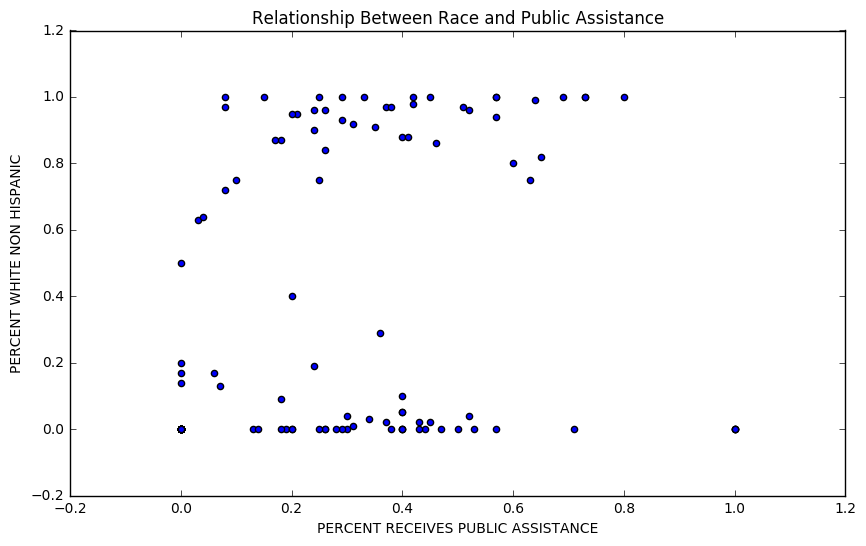

In [104]:
demographicDataPlot = demographicData.plot(x='PERCENT RECEIVES PUBLIC ASSISTANCE', y='PERCENT WHITE NON HISPANIC', kind = 'scatter', title = 'Relationship Between Race and Public Assistance')


#### Figure 1: Scatterplot of each NYC Zipcode Population Percent White Against Percent Population That Receives Welfare

# EXTRA CREDIT: TIME BASED DATA

In [97]:
#SNAP recipients data over time
#http://urbanprofiler.cloudapp.net/dataset/5c4s-jwtq/data
snapData = pd.DataFrame.from_csv(DFdata + '/5c4s-jwtq/1414246111/5c4s-jwtq')
snapData.head(3)

,Month,Total SNAP Recipients,Monthly Percent Change,Yearly Percent Change
Year,,,,
1995,1,1456024.0,0.1%,5.7%
1995,2,1454815.0,-0.1%,5%
1995,3,1458300.0,0.2%,4.7%


In [98]:
snapData = snapData.drop(['Monthly Percent Change', 'Yearly Percent Change'], 1)
snapData = snapData.drop(snapData.tail(6).index)
snapData = snapData.reset_index()
snapData['Year'] = snapData[snapData.columns[0]] 
snapData['Date'] = snapData['Year'] + '-' + snapData['Month']
snapData = snapData.drop(['Year', 'Month'], 1)
snapData

,Total SNAP Recipients,Date
0,1456024.0,1995-1
1,1454815.0,1995-2
2,1458300.0,1995-3
3,1459683.0,1995-4
4,1451929.0,1995-5
5,1442051.0,1995-6
6,1435025.0,1995-7
7,1425147.0,1995-8
8,1416455.0,1995-9
9,1405342.0,1995-10


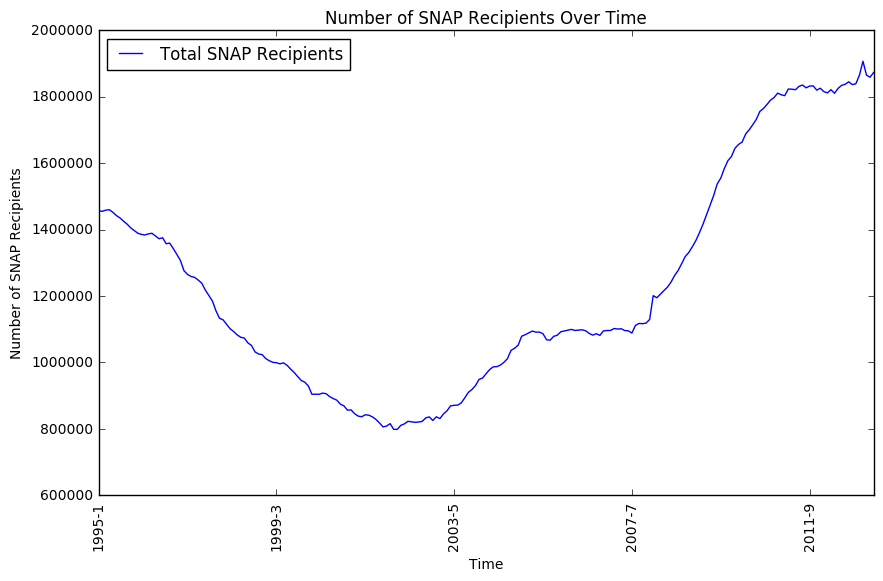

In [103]:
snapDataPlot = snapData.plot(x='Date', y='Total SNAP Recipients', rot=90, title = 'Number of SNAP Recipients Over Time')
snapDataPlot.set_xlabel("Time")
snapDataPlot.set_ylabel("Number of SNAP Recipients")

#### Figure 2: Number of individuals receiving SNAP benefits over time